# DataFrame
- import pandas as pd
- x,y 자표평면 2차원
- 행은 index, 열은 column으로 조회 가능
- 데이터프레임을 추출하거나 조작 할 때에는 행과 열로 접근

# Series
- 시리즈 형태 : 다양한 연산 가능, numpy에서도 제공

In [1]:
import pandas as pd
df = pd.DataFrame({'이름':['홍길동','김영희','김철수'],
                  '성적':['A','B','A'],
                  '점수':[10,20,30]})

In [2]:
df

,이름,성적,점수
0,홍길동,A,10
1,김영희,B,20
2,김철수,A,30


- 2차원 형태
- 행 = 인덱스
- 칼럼 = 열 = 이름, 성적, 점수로 구성


In [3]:
# 성적만 추출하고 싶다면 
df['성적']

0    A
1    B
2    A
Name: 성적, dtype: object

In [4]:
type(df['성적']) # Series 형태

pandas.core.series.Series

### column 기준 추출

In [5]:
df[['이름', '성적']] # 팬시색인 -> 대괄호 두번!! 

,이름,성적
0,홍길동,A
1,김영희,B
2,김철수,A


In [6]:
df [['이름', '점수']]

,이름,점수
0,홍길동,10
1,김영희,20
2,김철수,30


In [8]:
# 모든 행의 '점수' 의 합 구하기
df['점수'].sum()

60

In [9]:
# 모든 행의 이름과 점수의 합 구하기
# 이름은 string 형태라서 연달아서 결과 나옴
df[['이름', '점수']].sum()

이름    홍길동김영희김철수
점수           60
dtype: object

In [10]:
df.sum()

이름    홍길동김영희김철수
성적          ABA
점수           60
dtype: object

### mpg 데이터로 살펴보기

In [13]:
mpg = pd.read_csv('mpg.csv')

In [14]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [15]:
mpg['manufacturer']

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [17]:
mpg[['manufacturer', 'model']]

,manufacturer,model
0,audi,a4
1,audi,a4
2,audi,a4
3,audi,a4
4,audi,a4
...,...,...
229,volkswagen,passat
230,volkswagen,passat
231,volkswagen,passat
232,volkswagen,passat


In [18]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category'],
      dtype='object')

In [21]:
mpg_sp = mpg [[ 'manufacturer', 'model', 'hwy']]
mpg_sp

,manufacturer,model,hwy
0,audi,a4,29
1,audi,a4,29
2,audi,a4,31
3,audi,a4,30
4,audi,a4,26
...,...,...,...
229,volkswagen,passat,28
230,volkswagen,passat,29
231,volkswagen,passat,26
232,volkswagen,passat,26


In [23]:
# 데이터 타입을 보는 방법
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


- model, hwy의 Dtype이 다르다. 
- object는 어떤 식으로 접근해야 할까? => 문자열 데이터를 숫자로 변경
- object 맞게 기술통계 해야 한다. 
* 1. 빈도 , 2. 라벨링 ( 인코딩 )

In [24]:
# 아우디 차량은 몇개 있을까?
mpg_sp ['manufacturer'].value_counts() # 값을 세는 메서드

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [25]:
mpg_mc = mpg_sp ['manufacturer'].value_counts()
mpg_mc

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [27]:
type(mpg_mc)

pandas.core.series.Series

In [28]:
sum(mpg['cty']/len(mpg))

16.858974358974322

In [31]:
mpg.head(10)
# 10개의 행(데이터) 미리보기

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [32]:
mpg.tail(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
224,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [34]:
mpg.shape
# 데이터프레임 크기 확인 -> 행과 열의 갯수 확인

(234, 11)

In [35]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [37]:
mpg.describe()
# 요약통계치 제공 # 수치형 데이터만 존재 

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


## Describe를 왜 확인할까?
- describe : 데이터에 대한 분포, 이상치 확인하기 위해서
- 평균의 함정에 빠지지 않기 위해 산포도를 볼 수 있는 분산, 표준편차 확인
- 분산, 표준편차는 평균에 기반
- 사분위수 25, 50, 75 IQR은 중앙값을 기준
- 요약통계를 보면 데이터의 개괄적인 분포이해 가능 -> 평균에 함정에 빠지지 X
#### 데이터의 분포와 이상치는 왜 봐야하나?
- 회귀분석, 분류, 머신러닝,딥러닝, 통계분석 등
- 정규분포를 가정하고 진행하기 때문에
- 정규분포에 근사하는지 확인하기 위해서 데이터의 분포와 이상치 확인!


<AxesSubplot:>

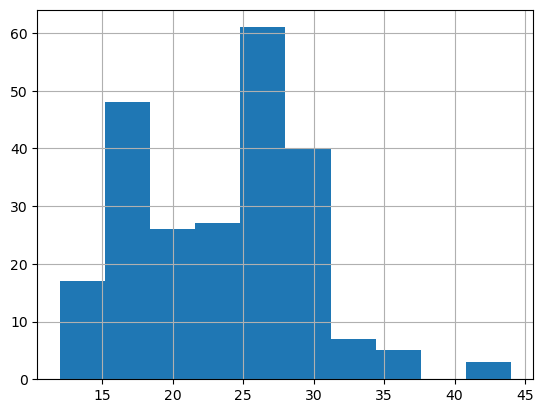

In [39]:
mpg['hwy'].hist()
# mpg의 hwy 데이터에 대한 히스토그램

In [42]:
mpg.describe()
# 수치형 변수만 기술통계량 제공

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [44]:
# hwy와 cty더한 tot라는 변수 생성
mpg['tot']= mpg['cty']+ mpg['hwy']
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,tot
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,47
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,50
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,42
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,44


In [48]:
# tot변수 값이 40보다 크면 good을 갖고, 같거나 작으면 bad를 갖는 새로운 변수 test 생성
import numpy as np
mpg['test']= np.where(mpg['tot']>40, 'good','bad')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,tot,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,good
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,good
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,good
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,good
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,47,good
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,50,good
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,42,good
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,44,good


In [49]:
# good과 bad의 개수 확인
mpg.test.value_counts()

good    123
bad     111
Name: test, dtype: int64

In [50]:
test_ct = mpg['test'].value_counts()

<AxesSubplot:>

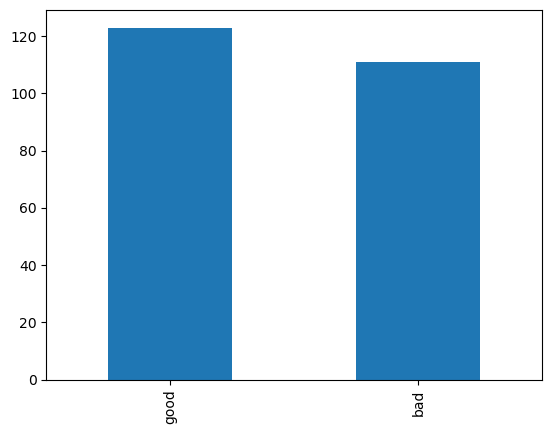

In [51]:
test_ct.plot.bar()